
## $\hspace{70pt}$Data Visualization and Analytics Lab (CSP451-3)
## $\hspace{120pt}$ Practical 6


### Name :Vinni Fengade
### Roll No. :67

## $\hspace{70pt} $PART(A): K-means clustering

### 1. Open and display the image “dog.jpeg”. Convert the image into NumPy array, so that ###it can be used in further processing. [Hint: Use PIL module from python]

In [2]:
!pip install pillow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
image = Image.open('dogs.jpeg')

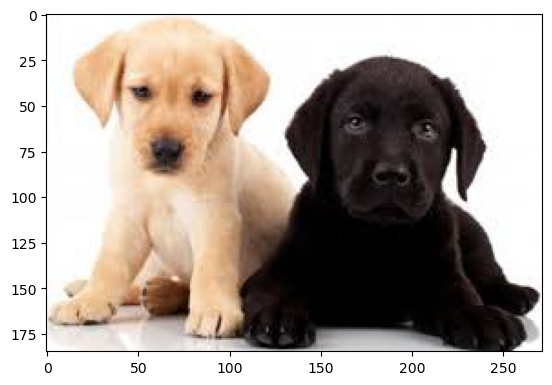

In [5]:
plt.imshow(image)
plt.axis('on')  # Hide axes
plt.show()

# Convert the image to a NumPy array
image_array = np.array(image)

In [6]:
print(image_array)

[[[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[252 248 249]
  [254 250 251]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[247 245 246]
  [250 248 249]
  [255 253 254]
  ...
  [255 255 255]
  [252 252 252]
  [244 244 244]]

 [[253 251 254]
  [253 251 254]
  [253 251 252]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


### 2. Use k means clustering with k set to 3 and cluster the image.
### [Hint: Refer to k-means module of scikit learn]

### 3. Predict the cluster label of every pixel in the image and plot it back as an image.

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


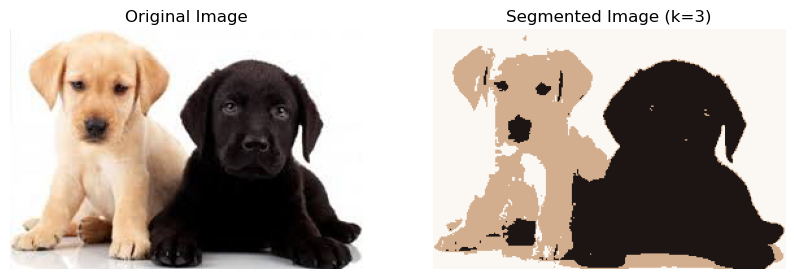

In [7]:
pixel_values = image_array.reshape((-1, 3))

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pixel_values)

labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

segmented_image = cluster_centers[labels].reshape(image_array.shape)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title("Segmented Image (k=3)")
plt.axis('off')

plt.show()


### 4. Find out the three dominant color in the image.
### [Hint: The cluster centers should correspond to three dominant colors]

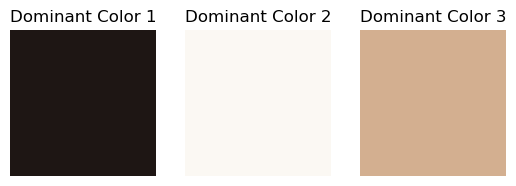

In [8]:
dominant_colors = cluster_centers.round().astype(int)

# Display the dominant colors
for i, color in enumerate(dominant_colors):
    plt.subplot(1, 3, i + 1)
    plt.imshow([[color]])
    plt.title(f"Dominant Color {i + 1}")
    plt.axis('off')

plt.show()

## $\hspace{70pt} $PART(B): Graph based clustering

### Consider a given graph of Programming languages. Smaller the weight more is the relation between the nodes.

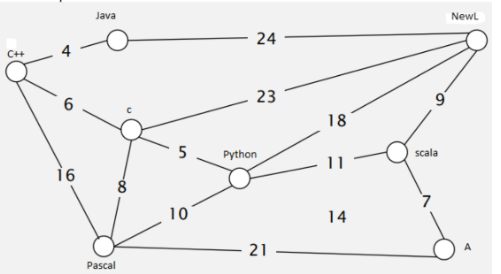

### Find the minimum spanning tree (using any method) and perform graph based clustering (on MST) to cluster similar languages using the technique of deletion of inconsistent edges.

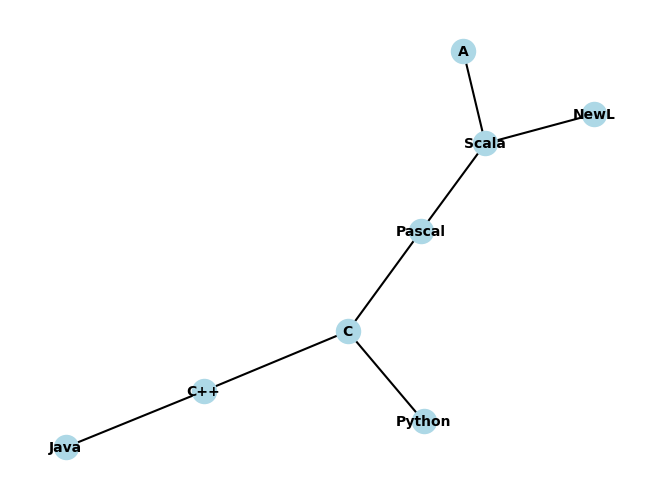

In [78]:
import networkx as nx

# Define the edge data
edges = [
    ("C++", "Java", 4),
    ("C++", "C", 6),
    ("C++", "Pascal", 16),
    ("Java", "NewL", 24),
    ("C", "NewL", 23),
    ("C", "Python", 5),
    ("C", "Pascal", 8),
    ("Pascal", "Python", 10),
    ("Pascal", "A", 21),
    ("NewL", "Python", 18),
    ("NewL", "Scala", 9),
    ("Pascal", "Scala", 11),
    ("Scala", "A", 7)
]

# Create an empty graph
G = nx.Graph()

# Add edges with weights to the graph
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Find the Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G)

nx.draw(mst, with_labels=True,node_color='lightblue', font_size=10, font_color='black', font_weight='bold', width=1.5)

### Show edges are consistent and which are not in a tabular format with computations.

Edge Consistency Table:
		Edge	 	   | 	Weight	 | 		 Avg Weight	 | 	Consistency	 
---------------------------------------------------------------------------------------------------
  C++     	 -  	C	  | 	 6.00 	  |   	5.00  	  |    	6.33 	   |     No
  C     	 -  	Pascal	  | 	 8.00 	  |   	6.33  	  |    	9.50 	   |     No
  Pascal     	 -  	Scala	  | 	 11.00 	  |   	9.50  	  |    	9.00 	   |     No


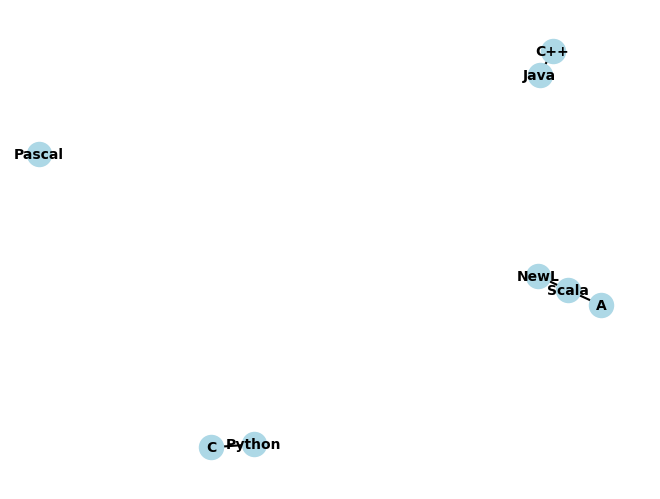

In [79]:
# Calculate the average weight of adjacent edges
average_weights = {}
for u, v, weight in mst.edges(data=True):
    if u not in average_weights:
        average_weights[u] = []
    if v not in average_weights:
        average_weights[v] = []
    average_weights[u].append(weight['weight'])
    average_weights[v].append(weight['weight'])

# lengg = {}
for node in average_weights:
#     lengg[u].append(len(average_weight[node]))
    average_weights[node] = sum(average_weights[node]) / len(average_weights[node])

# Delete inconsistent edges based on the average weight
# inconsistent_edges = [(u, v) for u, v, weight in mst.edges(data=True) if weight['weight'] > average_weights[u] or weight['weight'] > average_weights[v]]
inconsistent_edges = []
print("Edge Consistency Table:")
print("\t\tEdge\t \t   | \tWeight\t | \t\t Avg Weight\t | \tConsistency\t ")
print("---------------------------------------------------------------------------------------------------")

for u, v, weight in mst.edges(data=True):
    if weight['weight'] > average_weights[u] or weight['weight'] > average_weights[v]:
        print(f"  {u}     \t -  \t{v}\t  | \t {weight['weight']:.2f} \t  |   \t{average_weights[u]:.2f}  \t  |    \t{average_weights[v]:.2f} \t   |     No")
        inconsistent_edges.append((u, v, weight['weight']))
# print(inconsistent_edges)


# for u, v, weight in mst.edges(data=True):
#     aavg_weight = ((average_weights[u]*lengg[u])) + (average_weights[v]*len[u])))/(len(average_weights[u])+len(average_weights[v]-2))
#     if weight['weight'] > aavg_weight:
#         print(f"  {u}     \t -  \t{v}\t  | \t {weight['weight']:.2f} \t  |   \t{average_weights[u]:.2f}  \t  |    \t{average_weights[v]:.2f} \t   |     No")
#         inconsistent_edges.append((u, v, weight['weight']))
# print(inconsistent_edges)

mst.remove_edges_from(inconsistent_edges)
nx.draw(mst, with_labels=True,node_color='lightblue', font_size=10, font_color='black', font_weight='bold', width=1.5)

In [64]:
# Perform graph-based clustering
clusters = list(nx.connected_components(mst))

# Print the clusters
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {', '.join(cluster)}")

Cluster 1: C++, Java
Cluster 2: Python, C
Cluster 3: Pascal
Cluster 4: Scala, NewL, A


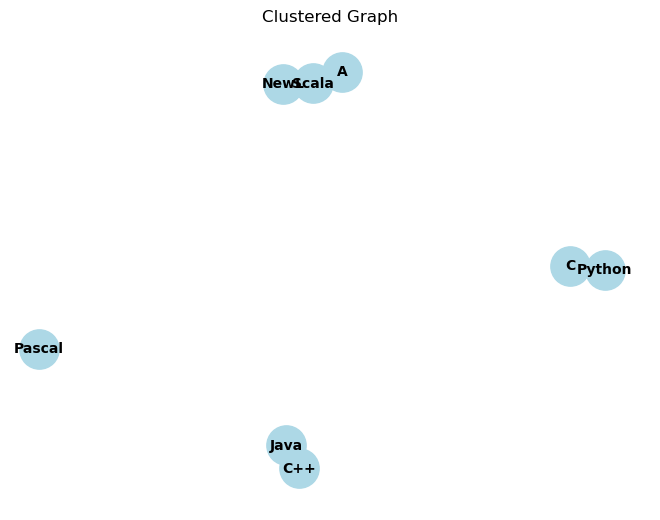

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph for visualizing the clusters
cluster_graph = nx.Graph()

# Add nodes and edges for each cluster
for i, cluster in enumerate(clusters):
    cluster_graph.add_nodes_from(cluster)
    for u, v, weight in edges:
        if u in cluster and v in cluster:
            cluster_graph.add_edge(u, v, weight=weight)

# Define positions for the nodes (you can adjust this for better visualization)
pos = nx.spring_layout(cluster_graph)

# Draw the nodes and edges
nx.draw(cluster_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=800, font_size=10)
edge_labels = nx.get_edge_attributes(cluster_graph, 'weight')
nx.draw_networkx_edge_labels(cluster_graph, pos, edge_labels=edge_labels, font_size=8)

# Display the graph
plt.title("Clustered Graph")
plt.show()


### Also suggest if a user wants to learn the language NewL then knowledge of which knowledge will be helpful.

Thus for user to learn NewL, knowledgeof Scala and A would be helpful.